In [3]:
#Name : Manahil Sarwar
#Section : AI-K
#Roll No : 21I-0293

In [4]:
#Loading Libraries
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from itertools import combinations
import matplotlib.pyplot as plt


**QUESTION # 1 : Image Stitching using SIFT on COIL-20 Dataset**

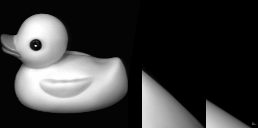

Saved panorama as obj_1_Panorama.png




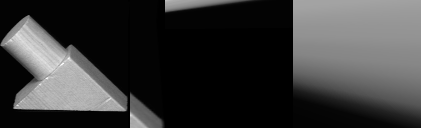

Saved panorama as obj_2_Panorama.png




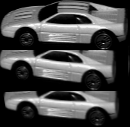

Saved panorama as obj_3_Panorama.png




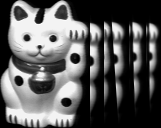

Saved panorama as obj_4_Panorama.png




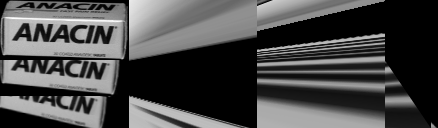

Saved panorama as obj_5_Panorama.png




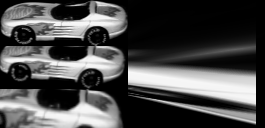

Saved panorama as obj_6_Panorama.png




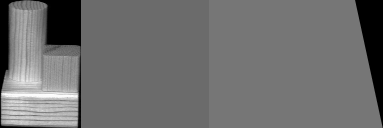

Saved panorama as obj_7_Panorama.png




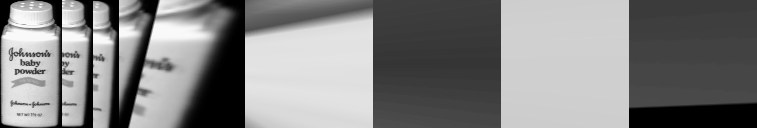

Saved panorama as obj_8_Panorama.png




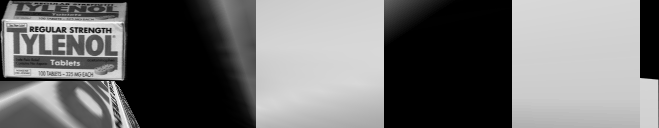

Saved panorama as obj_9_Panorama.png




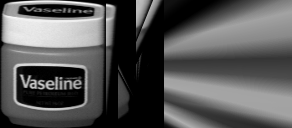

Saved panorama as obj_10_Panorama.png




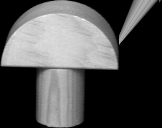

Saved panorama as obj_11_Panorama.png




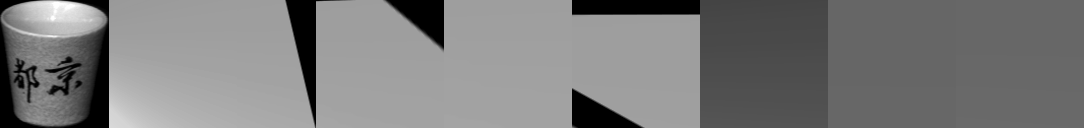

Saved panorama as obj_12_Panorama.png




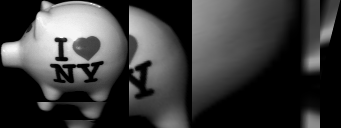

Saved panorama as obj_13_Panorama.png




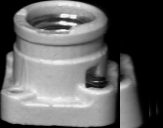

Saved panorama as obj_14_Panorama.png




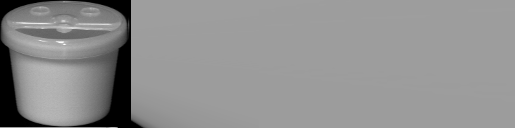

Saved panorama as obj_15_Panorama.png




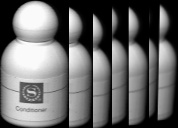

Saved panorama as obj_16_Panorama.png




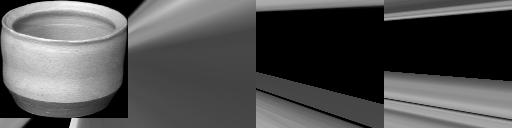

Saved panorama as obj_17_Panorama.png




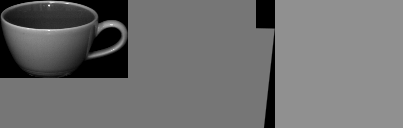

Saved panorama as obj_18_Panorama.png




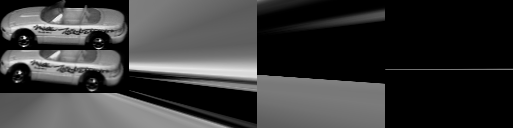

Saved panorama as obj_19_Panorama.png




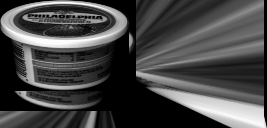

Saved panorama as obj_20_Panorama.png




In [6]:
#Function to stitch two images together using SIFT and homography
def stitch_images(img1,img2):
  gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  sift=cv2.SIFT_create()
  kp1,des1=sift.detectAndCompute(gray1,None)
  kp2,des2=sift.detectAndCompute(gray2,None)
  bf=cv2.BFMatcher()
  matches=bf.knnMatch(des1,des2,k=2)
  good=[]
  #find and store the good matches
  for m,n in matches:
      if m.distance < 0.45*n.distance:
          good.append(m)
  matches=np.asarray(good)
  if len(good) >= 4:
      src=np.float32([ kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
      dst=np.float32([ kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
      H,masked=cv2.findHomography(src,dst,cv2.RANSAC,5.0)
      if H is None:
        return None
  else:
    return None
  height,width,channels=img2.shape
  warped_img1=cv2.warpPerspective(img1,H,(width+img1.shape[1],height))
  height,width,channels=img1.shape
  warped_img1[0:height,0:width]=img1
  #blended_img = cv2.addWeighted(warped_img1, 0.5, np.pad(img2, [(0,0), (0,img1.shape[1]), (0,0)], mode='constant'), 0.5, 0)
  rows,cols=np.where(warped_img1[:,:,0] != 0)
  min_row,max_row=min(rows),max(rows) + 1
  min_col,max_col=min(cols),max(cols) + 1
  warped_img1=warped_img1[min_row:max_row,min_col:max_col,:]
  return warped_img1

i=1
while i<=20:
  image_paths=sorted([os.path.join(f'/content/coil-20/coil-20/{i}', filename) for filename in os.listdir(f'/content/coil-20/coil-20/{i}') if filename.endswith('.png')])
  images=[cv2.imread(image_path) for image_path in image_paths]
  panorama=images[0]
  stitched_count=1
  image_index=1
  #Stitch images one by one until we have stitched 15 images together
  while stitched_count < 15 and image_index < len(images):
      result=stitch_images(panorama,images[image_index])
      if result is not None:
          panorama=result
          stitched_count+=1
      image_index+=1

  #Display the final panorama of the image
  cv2_imshow(panorama)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  # Save the final panorama
  panorama_filename = f'obj_{i}_Panorama.png'
  cv2.imwrite(panorama_filename, panorama)
  print(f'Saved panorama as {panorama_filename}')
  print('\n')
  i=i+1


**QUESTION # 2 : Build a Chess Game using Image Processing**


Number of Squares is :  64
Chessboard Image: 



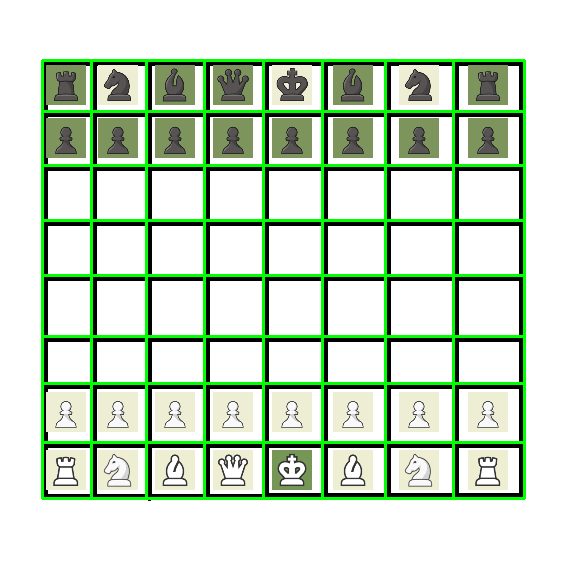

3D Transformed Image: 



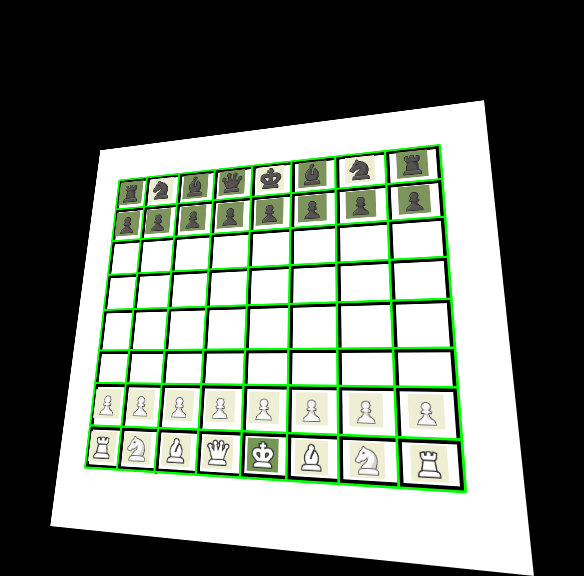

True

In [9]:
#Part 1: Draw lines using Hough Lines
img=cv2.imread('/content/chess.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,150)
lines=cv2.HoughLines(edges,1,np.pi/180,200)
horizontal_lines=[]
vertical_lines=[]
for i in lines:
    rho,theta=i[0]
    if np.pi/4 < theta<3 * np.pi/4:
        vertical_lines.append((rho,theta))
    else:
        horizontal_lines.append((rho,theta))

def filter_similar_lines(lines,threshold=10):
    filtered_lines=[]
    for i in lines:
        rho,theta=i
        if all(abs(rho-l[0]) > threshold for l in filtered_lines):
            filtered_lines.append((rho,theta))
    return filtered_lines

horizontal_lines=filter_similar_lines(horizontal_lines)
vertical_lines=filter_similar_lines(vertical_lines)

def intersection(line1,line2):
    rho1,theta1=line1
    rho2,theta2=line2
    A=np.array([[np.cos(theta1),np.sin(theta1)],[np.cos(theta2),np.sin(theta2)]])
    B=np.array([rho1,rho2])

    if np.linalg.det(A)==0:
        return None
    x,y=np.linalg.solve(A,B)
    return int(np.round(x)),int(np.round(y))

intersection_points=[]

for h_line in horizontal_lines:
    for v_line in vertical_lines:
        point=intersection(h_line,v_line)
        if point is not None:
            intersection_points.append(point)

intersection_points=sorted(intersection_points,key=lambda x: (x[1],x[0]))

#Draw lines connecting the intersection points
for i in range(len(intersection_points)):
    for j in range(i+1,len(intersection_points)):
        x1,y1=intersection_points[i]
        x2,y2=intersection_points[j]
        if abs(y1-y2)<10:  #Horizontal line
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        elif abs(x1-x2)<10:  #Vertical line
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

#Part 2: Count number of squares
#Count the number of unique horizontal and vertical lines
num_horizontal_lines=len(horizontal_lines)
num_vertical_lines=len(vertical_lines)

#Calculate the number of squares
if num_horizontal_lines == 9 and num_vertical_lines == 9:
    num_squares=(num_horizontal_lines-1)*(num_vertical_lines-1)
else:
    num_squares=(min(num_horizontal_lines,num_vertical_lines)-1)** 2
print("Number of Squares is : ",num_squares)

#Calculate square centers
square_centers=[]
grid_size=int(np.sqrt(len(intersection_points)))

for row in range(grid_size-1):
    for col in range(grid_size-1):
        p1=intersection_points[row * grid_size + col]
        p2=intersection_points[row * grid_size + col + 1]
        p3=intersection_points[(row + 1) * grid_size + col]
        p4=intersection_points[(row + 1) * grid_size + col + 1]
        center_x = int((p1[0] + p2[0] + p3[0] + p4[0]) / 4)
        center_y = int((p1[1] + p2[1] + p3[1] + p4[1]) / 4)
        square_centers.append((center_x,center_y))

#Part 3:Placing all chess pieces on their respective squares
#Define the initial positions for each chess piece
chessboard_layout=[
    ["black_rook", "black_knight", "black_bishop", "black_queen", "black_king", "black_bishop", "black_knight", "black_rook"],
    ["black_pawn"] * 8,
    [None] * 8,
    [None] * 8,
    [None] * 8,
    [None] * 8,
    ["white_pawn"] * 8,
    ["white_rook", "white_knight", "white_bishop", "white_queen", "white_king", "white_bishop", "white_knight", "white_rook"]
]

#Function to load and scale a chess piece image
def load_chess_piece(piece_name,size=(40,40)):
    if piece_name is None:
        return None
    piece_img=cv2.imread(f'/content/{piece_name}.png')
    if piece_img is None:
        print(f"Error: Cannot find {piece_name}.png")
        return None
    return cv2.resize(piece_img,size)

#Place each piece on its corresponding square
for row in range(8):
    for col in range(8):
        piece_name=chessboard_layout[row][col]
        piece_img=load_chess_piece(piece_name)

        if piece_img is not None:
            x,y=square_centers[row * 8 + col]
            piece_h,piece_w=piece_img.shape[:2]
            top_left_x=x-piece_w // 2
            top_left_y=y-piece_h // 2
            if top_left_x>=0 and top_left_y>=0 and (top_left_x+piece_w) <= img.shape[1] and (top_left_y+piece_h)<=img.shape[0]:
                img[top_left_y:top_left_y+piece_h, top_left_x:top_left_x+piece_w]=piece_img
print("Chessboard Image: \n")
cv2_imshow(img)
cv2.imwrite('lined_chessboard.png',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Part 4: Applying Transformations to the Chessboard
#Define source points
h,w=img.shape[:2]
src_points=np.float32([[0,0],[w,0],[0,h],[w,h]])
dst_points=np.float32([[100,150],[w-100,100],[50,h-50],[w-50,h]])
#Compute the perspective transformation matrix
M=cv2.getPerspectiveTransform(src_points,dst_points)
warped_img=cv2.warpPerspective(img,M,(w,h))
#Display the transformed image
print("3D Transformed Image: \n")
cv2_imshow(warped_img)
cv2.imwrite('final_warped.png',warped_img)

In [2]:
!unzip '/content/coil-20 (2).zip' -d '/content/coil-20'

Archive:  /content/coil-20 (2).zip
   creating: /content/coil-20/coil-20/1/
 extracting: /content/coil-20/coil-20/1/obj1__0.png  
 extracting: /content/coil-20/coil-20/1/obj1__1.png  
 extracting: /content/coil-20/coil-20/1/obj1__10.png  
 extracting: /content/coil-20/coil-20/1/obj1__11.png  
 extracting: /content/coil-20/coil-20/1/obj1__12.png  
 extracting: /content/coil-20/coil-20/1/obj1__13.png  
 extracting: /content/coil-20/coil-20/1/obj1__14.png  
 extracting: /content/coil-20/coil-20/1/obj1__15.png  
 extracting: /content/coil-20/coil-20/1/obj1__16.png  
 extracting: /content/coil-20/coil-20/1/obj1__17.png  
 extracting: /content/coil-20/coil-20/1/obj1__18.png  
 extracting: /content/coil-20/coil-20/1/obj1__19.png  
 extracting: /content/coil-20/coil-20/1/obj1__2.png  
 extracting: /content/coil-20/coil-20/1/obj1__20.png  
 extracting: /content/coil-20/coil-20/1/obj1__21.png  
 extracting: /content/coil-20/coil-20/1/obj1__22.png  
 extracting: /content/coil-20/coil-20/1/obj1__2